# Application du Shor code

In [1]:
from qiskit import execute, QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer
from qiskit.visualization import *
import qiskit.quantum_info as qi
backend = BasicAer.get_backend('qasm_simulator')

In [2]:
def preparation_shor_code():
    preparation_circuit = QuantumCircuit(9)
    #étendre l'etat de q_0 sur q_3 et q_6
    for i in [3,6] : preparation_circuit.cx(0, i)
    #appliquer les portes de hadamard 
    for i in [0,3,6] : preparation_circuit.h(i)
    #étendre les etats des q_0/3/6 sur leur sous groupes 
    for i in [0,3,6] : 
        for j in range(1, 3):
            preparation_circuit.cx(i, i+j)
    #circuit de préparation fini
    print(preparation_circuit.draw(output="latex_source") )
    preparation_gate = preparation_circuit.to_gate()
    preparation_gate.name = "Preparation shore code"
    return preparation_gate
preparation_gate = preparation_shor_code()

\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{ {q}_{0} :  } & \lstick{ {q}_{0} :  } & \ctrl{3} & \ctrl{6} & \gate{\mathrm{H}} & \ctrl{1} & \ctrl{2} & \qw & \qw\\ 
	 	\nghost{ {q}_{1} :  } & \lstick{ {q}_{1} :  } & \qw & \qw & \qw & \targ & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{2} :  } & \lstick{ {q}_{2} :  } & \qw & \qw & \qw & \qw & \targ & \qw & \qw\\ 
	 	\nghost{ {q}_{3} :  } & \lstick{ {q}_{3} :  } & \targ & \qw & \gate{\mathrm{H}} & \ctrl{1} & \ctrl{2} & \qw & \qw\\ 
	 	\nghost{ {q}_{4} :  } & \lstick{ {q}_{4} :  } & \qw & \qw & \qw & \targ & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{5} :  } & \lstick{ {q}_{5} :  } & \qw & \qw & \qw & \qw & \targ & \qw & \qw\\ 
	 	\nghost{ {q}_{6} :  } & \lstick{ {q}_{6} :  } & \qw & \targ & \gate{\mathrm{H}} & \ctrl{1} & \ctrl{2} & \qw & \qw\\ 
	 	\nghost{ {q}_{7} :  } & \lstick{ {q}_{7} :  } & \qw & \qw & \qw & \ta

In [3]:
def correction_shor_code():
    correction_circuit = QuantumCircuit(9)
    #on applique la correction de bit flip aux sous-groupes
    for i in [0,3,6] : 
        for j in [1,2] : correction_circuit.cx(i, i+j)
        correction_circuit.ccx(i+1, i+2, i)
    #on applique la correction de sign flip au groupe [0,3,6]
    for i in [0, 3, 6] : correction_circuit.h(i)
    for i in [3, 6] : correction_circuit.cx(0, i)
    correction_circuit.ccx(6, 3, 0)
    #circuit de correction fini
    print(correction_circuit.draw(output = "latex_source"))
    correction_gate = correction_circuit.to_gate()
    correction_gate.name = "Correction shor code"
    return correction_gate
correction_gate = correction_shor_code()

\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{ {q}_{0} :  } & \lstick{ {q}_{0} :  } & \ctrl{1} & \ctrl{2} & \targ & \gate{\mathrm{H}} & \ctrl{3} & \ctrl{6} & \targ & \qw & \qw\\ 
	 	\nghost{ {q}_{1} :  } & \lstick{ {q}_{1} :  } & \targ & \qw & \ctrl{-1} & \qw & \qw & \qw & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{2} :  } & \lstick{ {q}_{2} :  } & \qw & \targ & \ctrl{-1} & \qw & \qw & \qw & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{3} :  } & \lstick{ {q}_{3} :  } & \ctrl{1} & \ctrl{2} & \targ & \gate{\mathrm{H}} & \targ & \qw & \ctrl{-3} & \qw & \qw\\ 
	 	\nghost{ {q}_{4} :  } & \lstick{ {q}_{4} :  } & \targ & \qw & \ctrl{-1} & \qw & \qw & \qw & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{5} :  } & \lstick{ {q}_{5} :  } & \qw & \targ & \ctrl{-1} & \qw & \qw & \qw & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{6} :  } & \lstick{ {q}_{6} :  } & \ctrl{1} & \ctrl{2} & \targ & \ga

On veut vérifier que le code de shor ne modifie pas q_0 si il n'y a pas d'erreur.

In [5]:
def print_state_vector(circuit):
    """Pour afficher proprement un vecteur d'etat"""
    vector_dict = ector_dict = qi.Statevector.from_instruction(circuit).to_dict()
    print('\n'.join(["{} : {}".format(key, vector_dict[key]) for key in vector_dict.keys()]))

In [6]:
#test non modiffication du bit corrigé
circuit_test_1 = QuantumCircuit(9, 9)
print("Etat Initiale")
print_state_vector(circuit_test_1)

circuit_test_1.append(preparation_gate, range(9))
circuit_test_1.append(correction_gate, range(9))
print("\nEtat Finale")
print_state_vector(circuit_test_1)

Etat Initiale
000000000 : (1+0j)

Etat Finale
000000000 : (0.9999999999999996+0j)
000000001 : (1.905050747901445e-52+0j)
000001000 : (9.52420782539596e-18+0j)
000001001 : (-1.2183947074714076e-35+0j)
001000000 : (2.3615800235104456e-17+0j)
001000001 : (1.9205844302555546e-35+0j)
001001000 : (6.223285321735372e-19+0j)
001001001 : (1.2631615347037043e-34+0j)


Cependant le vecteur d'etat final n'est pas le même que celui de l'etat initial.
Cela est dû aux imprécisions de calcul.
On peut cependant verifier qu'experimentalement cela fonctionne bien.

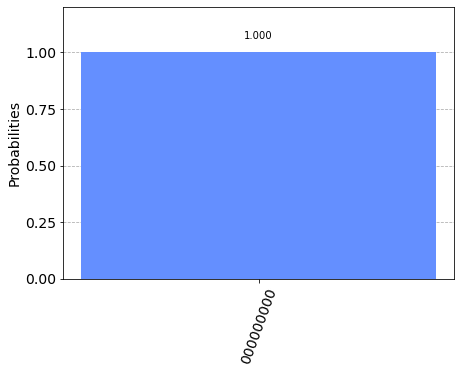

In [7]:
circuit_test_1.measure(range(9), range(9))
job = execute(circuit_test_1, backend, shots = 65000)
res = job.result()
plot_histogram(res.get_counts())

Cependant si il y avait eu un changement de phase, nous ne l'auriont pas noté avec cette état initiale. On peut donc appliquer des portes de hadamard avant et après le circuit pour vérifier.

In [8]:
phase_test = QuantumCircuit(9, 9)
phase_test.h(0)
phase_test.append(preparation_gate, range(9))
phase_test.append(correction_gate, range(9))
phase_test.h(0)
phase_test.measure(range(9), range(9))
print(phase_test.draw(output = "latex_source"))

\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{ {q}_{0} :  } & \lstick{ {q}_{0} :  } & \gate{\mathrm{H}} & \multigate{8}{\mathrm{Preparation\,shore\,code}}_<<<{0} & \multigate{8}{\mathrm{Correction\,shor\,code}}_<<<{0} & \gate{\mathrm{H}} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \meter & \qw & \qw\\ 
	 	\nghost{ {q}_{1} :  } & \lstick{ {q}_{1} :  } & \qw & \ghost{\mathrm{Preparation\,shore\,code}}_<<<{1} & \ghost{\mathrm{Correction\,shor\,code}}_<<<{1} & \meter & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{2} :  } & \lstick{ {q}_{2} :  } & \qw & \ghost{\mathrm{Preparation\,shore\,code}}_<<<{2} & \ghost{\mathrm{Correction\,shor\,code}}_<<<{2} & \qw & \meter & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\ 
	 	\nghost{ {q}_{3} :  } & \lstick{ {q}_{3} :  } & \qw & \ghost{\mathrm{Preparation\,shore\,code}}_<<

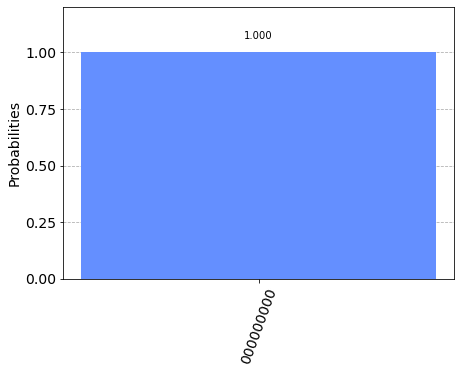

In [9]:
job = execute(phase_test, backend)
plot_histogram(job.result().get_counts())

On retrouve bien l'etat initiale. Comme attendu le code de shor est équivalent à un opération identité si il n'y a pas d'erreur à corriger.

In [10]:
#réalisation porte erreur 
def erreur(bits_flip = [], phase_flip = []):
    erreur_circuit = QuantumCircuit(9)
    for i in bits_flip : erreur_circuit.x(i)
    for i in phase_flip : erreur_circuit.z(i)
    erreur_gate = erreur_circuit.to_gate()
    erreur_gate.name = "Erreur"
    return erreur_gate

On ne peut pas obtenir un vecteur d'etat pleinement satisfaisant, nous ne pouvons donc qu'utiliser la mesure pour constater l'éfficacité du code correcteur.
D'abord constatons que l'on visualise bien les erreurs.

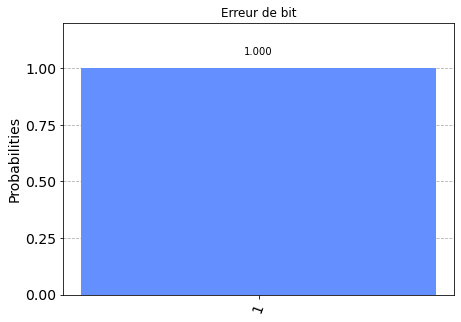

In [11]:
#voir l'erreur de bit
cr = QuantumCircuit(9, 1)
cr.append(erreur([0]), range(9))
cr.measure(0, 0)
job = execute(cr, backend)
plot_histogram(job.result().get_counts(), title = "Erreur de bit")

On constate bien l'erreur de bit, cependant on ne constaterais pas l'erreur de signe.

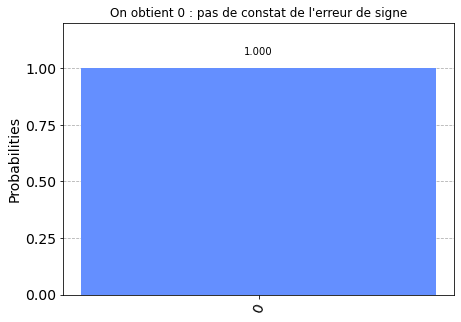

In [12]:
#ne pas voir l'erreur de sign
cr = QuantumCircuit(9, 1)
cr.append(erreur(phase_flip = [0]), range(9))
cr.measure(0, 0)
job = execute(cr, backend)
plot_histogram(job.result().get_counts(), title = "On obtient 0 : pas de constat de l'erreur de signe")

Pour constater l'erreur de signe on applique un changement de base, on va dans la base (|+>,|->). En effet on a, HZH = X, donc une erreur de signe sera équivalente à une erreur de bit et sera constatable.

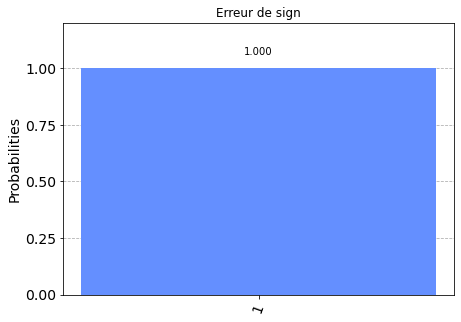

In [13]:
#voir l'erreur de sign
cr = QuantumCircuit(9, 1)
#Changer de base
cr.h(0)
#realiser l'erreur
cr.append(erreur(phase_flip = [0]), range(9))
#retourner dans le base de calcule
cr.h(0)

#mesurer l'erreur
cr.measure(0, 0)
job = execute(cr, backend)
plot_histogram(job.result().get_counts(), title = "Erreur de sign")

Ainsi pour constater la correction des erreurs de bit et de signe nous devrons réaliser deux circuit, avec et sans changement de base.

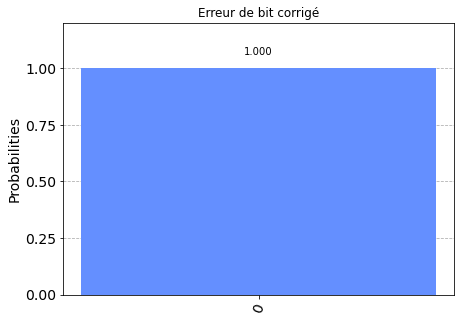

In [14]:
#Visualisation de la correction de bit
circuit = QuantumCircuit(9,1)

#initialisation du code correctif
circuit.append(preparation_gate, range(9))

#application de l'erreur (de bit et de phase)
circuit.append(erreur([0], [0]), range(9))

#fin du code correctif
circuit.append(correction_gate, range(9))

#mesure du resultat
circuit.measure(0, 0)
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), title = "Erreur de bit corrigé")

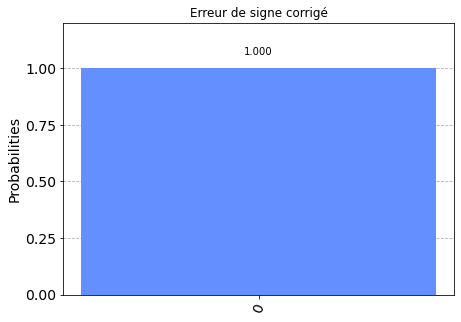

In [15]:
#Visualisation de la correction de signe
circuit = QuantumCircuit(9,1)

#changement de base
circuit.h(0)

#initialisation du code correctif
circuit.append(preparation_gate, range(9))

#application de l'erreur (de bit et de phase)
circuit.append(erreur([0], [0]), range(9))

#fin du code correctif
circuit.append(correction_gate, range(9))

#retour en base de calcul
circuit.h(0)

#mesure du resultat
circuit.measure(0, 0)
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), title = "Erreur de signe corrigé")